In [1]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.recurrent import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import aux_func as f


Using Theano backend.


In [4]:
feature_dim = 1
look_back = 0
data_file = 'abelha-only-rad.csv'
data_use_percent = 0.3

# fix random seed for reproducibility
#numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv(data_file, engine='python')

def create_window(data, feature_name, past_times =[]):
    index = [feature_name]
    dataframe = data.copy()
    for i in past_times:
        dataframe[feature_name+'_t-'+str(i)] = dataframe[feature_name].shift(periods=i, freq=None, axis=0)
        index.append(feature_name+'_t-'+str(i))
    index.append('act')
    
    return dataframe.tail(-max(window)).reindex_axis(index,axis=1)

def normalize(dataframe):
    old_act = dataframe['act']
    dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())
    dataframe2['act'] = old_act
    return dataframe2

def train_predict(dataframe, times = 1):
    dataset2 = dataframe.values
    #resizing dataset len for faster tests 
    dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
    dataset2 = dataset2.astype('float32')

    # split into train and test sets
    train_size = int(len(dataset2) * 0.70)
    test_size = len(dataset2) - train_size
    train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]

    

    trainX, trainY = f.create_dataset(train, feature_dim, look_back)
    testX, testY = f.create_dataset(test, feature_dim, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


    for i in range(times):
        model = f.baseline_model(feature_dim + look_back)
        model.fit(trainX, trainY, nb_epoch=500, verbose=0)

        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
        print(str(i)+' Train Score: %.6f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY, testPredict))
        print(str(i)+' Test Score: %.6f RMSE' % (testScore))

    f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)
    print(feature_dim)

dataframe.head(8), feature_dim

(      rad    act
 0   -3.54  0.023
 1   -3.54  0.028
 2   -3.54  0.092
 3   -3.54  0.161
 4   33.98  0.276
 5  154.70  0.618
 6  297.80  1.060
 7  817.20  1.240, 1)

In [5]:
dataframe1 = normalize(dataframe)
dataframe1

,rad,act
0,0.000000,0.023
1,0.000000,0.028
2,0.000000,0.092
3,0.000000,0.161
4,0.011469,0.276
5,0.048369,0.618
6,0.092110,1.060
7,0.250873,1.240
8,0.739878,1.217
9,0.892711,1.346


0 Train Score: 0.303556 RMSE
0 Test Score: 0.364832 RMSE


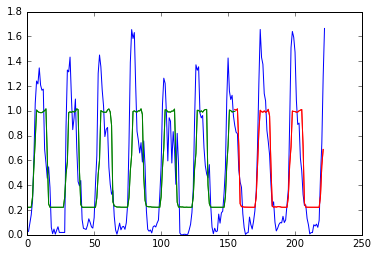

1


In [6]:
train_predict(dataframe1,1)

In [7]:
window = [3]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "rad", window)
feature_dim = len(window) + 1
dataframe1, feature_dim

(          rad   rad_t-3    act
 3    0.000000  0.000000  0.161
 4    0.011469  0.000000  0.276
 5    0.048369  0.000000  0.618
 6    0.092110  0.000000  1.060
 7    0.250873  0.011469  1.240
 8    0.739878  0.048369  1.217
 9    0.892711  0.092110  1.346
 10   0.990219  0.250873  1.207
 11   0.955678  0.739878  1.166
 12   0.729180  0.892711  1.175
 13   0.581848  0.990219  0.691
 14   0.339149  0.955678  0.581
 15   0.063132  0.729180  0.456
 16   0.003629  0.581848  0.548
 17   0.000000  0.339149  0.382
 18   0.000000  0.063132  0.060
 19   0.000058  0.003629  0.009
 20   0.000012  0.000000  0.046
 21   0.000006  0.000000  0.005
 22   0.000000  0.000058  0.037
 23   0.000000  0.000012  0.065
 24   0.000000  0.000006  0.019
 25   0.000000  0.000000  0.019
 26   0.000000  0.000000  0.019
 27   0.000000  0.000000  0.019
 28   0.010967  0.000000  0.019
 29   0.038312  0.000000  0.876
 30   0.055032  0.000000  1.329
 31   0.207682  0.010967  1.314
 32   0.772584  0.038312  1.433
 ..     

0 Train Score: 0.316504 RMSE
0 Test Score: 0.386846 RMSE
1 Train Score: 0.276434 RMSE
1 Test Score: 0.351243 RMSE


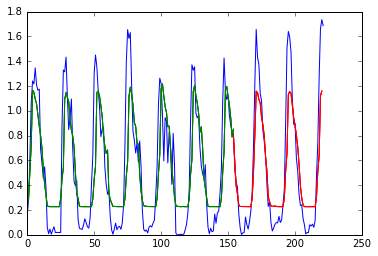

2


In [8]:
train_predict(dataframe1,2)

In [9]:
window = [3,6]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "rad", window)
feature_dim = len(window) + 1
dataframe1

,rad,rad_t-3,rad_t-6,act
6,0.092110,0.000000,0.000000,1.060
7,0.250873,0.011469,0.000000,1.240
8,0.739878,0.048369,0.000000,1.217
9,0.892711,0.092110,0.000000,1.346
10,0.990219,0.250873,0.011469,1.207
11,0.955678,0.739878,0.048369,1.166
12,0.729180,0.892711,0.092110,1.175
13,0.581848,0.990219,0.250873,0.691
14,0.339149,0.955678,0.739878,0.581
15,0.063132,0.729180,0.892711,0.456


0 Train Score: 0.252717 RMSE
0 Test Score: 0.311153 RMSE


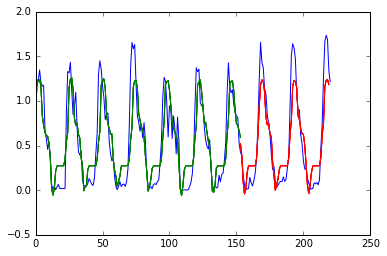

3


In [10]:
train_predict(dataframe1,1)

In [10]:
window = [3,6,12]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "rad", window)
feature_dim = len(window) + 1
dataframe1

,rad,rad_t-3,rad_t-6,rad_t-12,act
12,0.729180,0.892711,0.092110,0.000000,1.175
13,0.581848,0.990219,0.250873,0.000000,0.691
14,0.339149,0.955678,0.739878,0.000000,0.581
15,0.063132,0.729180,0.892711,0.000000,0.456
16,0.003629,0.581848,0.990219,0.011469,0.548
17,0.000000,0.339149,0.955678,0.048369,0.382
18,0.000000,0.063132,0.729180,0.092110,0.060
19,0.000058,0.003629,0.581848,0.250873,0.009
20,0.000012,0.000000,0.339149,0.739878,0.046
21,0.000006,0.000000,0.063132,0.892711,0.005


0 Train Score: 0.179778 RMSE
0 Test Score: 0.222312 RMSE
1 Train Score: 0.167652 RMSE
1 Test Score: 0.215090 RMSE
2 Train Score: 0.175591 RMSE
2 Test Score: 0.226452 RMSE
3 Train Score: 0.199604 RMSE
3 Test Score: 0.215428 RMSE
4 Train Score: 0.179395 RMSE
4 Test Score: 0.210864 RMSE
5 Train Score: 0.176658 RMSE
5 Test Score: 0.217009 RMSE
6 Train Score: 0.160899 RMSE
6 Test Score: 0.221862 RMSE
7 Train Score: 0.185086 RMSE
7 Test Score: 0.207909 RMSE
8 Train Score: 0.184178 RMSE
8 Test Score: 0.254110 RMSE
9 Train Score: 0.171113 RMSE
9 Test Score: 0.212563 RMSE


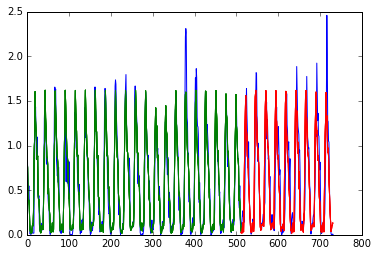

In [11]:
train_predict(dataframe1,10)

In [12]:
window = [3,6,12,24]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "rad", window)
feature_dim = len(window) + 1
dataframe1

,rad,rad_t-3,rad_t-6,rad_t-12,rad_t-24,act
24,0.000000,0.000006,0.000000,0.729180,0.000000,0.019
25,0.000000,0.000000,0.000058,0.581848,0.000000,0.019
26,0.000000,0.000000,0.000012,0.339149,0.000000,0.019
27,0.000000,0.000000,0.000006,0.063132,0.000000,0.019
28,0.010967,0.000000,0.000000,0.003629,0.011469,0.019
29,0.038312,0.000000,0.000000,0.000000,0.048369,0.876
30,0.055032,0.000000,0.000000,0.000000,0.092110,1.329
31,0.207682,0.010967,0.000000,0.000058,0.250873,1.314
32,0.772584,0.038312,0.000000,0.000012,0.739878,1.433
33,0.928168,0.055032,0.000000,0.000006,0.892711,1.114


0 Train Score: 0.165121 RMSE
0 Test Score: 0.223795 RMSE
1 Train Score: 0.167590 RMSE
1 Test Score: 0.227614 RMSE
2 Train Score: 0.170056 RMSE
2 Test Score: 0.214776 RMSE
3 Train Score: 0.169088 RMSE
3 Test Score: 0.223288 RMSE
4 Train Score: 0.177226 RMSE
4 Test Score: 0.226811 RMSE
5 Train Score: 0.172673 RMSE
5 Test Score: 0.236167 RMSE
6 Train Score: 0.165111 RMSE
6 Test Score: 0.221745 RMSE
7 Train Score: 0.188120 RMSE
7 Test Score: 0.222895 RMSE
8 Train Score: 0.188256 RMSE
8 Test Score: 0.230796 RMSE
9 Train Score: 0.177224 RMSE
9 Test Score: 0.212990 RMSE


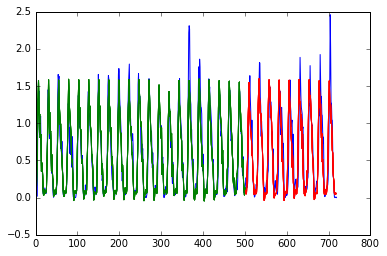

In [13]:
train_predict(dataframe1,10)

In [14]:
feature_dim

5